In [180]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [181]:
count = 0 
dirs = os.listdir('train/')
for dir in dirs:
    files = list(os.listdir('train/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 501 Images
rose Folder has 498 Images
tulip Folder has 607 Images
dandelion Folder has 646 Images
sunflower Folder has 495 Images
Images Folder has 2747 Images


In [182]:
base_dir = 'train/'
img_size = 180
batch = 32

In [183]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 2748 files belonging to 5 classes.
Using 2199 files for training.
Found 2748 files belonging to 5 classes.
Using 549 files for validation.


In [184]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [185]:
import matplotlib.pyplot as plt

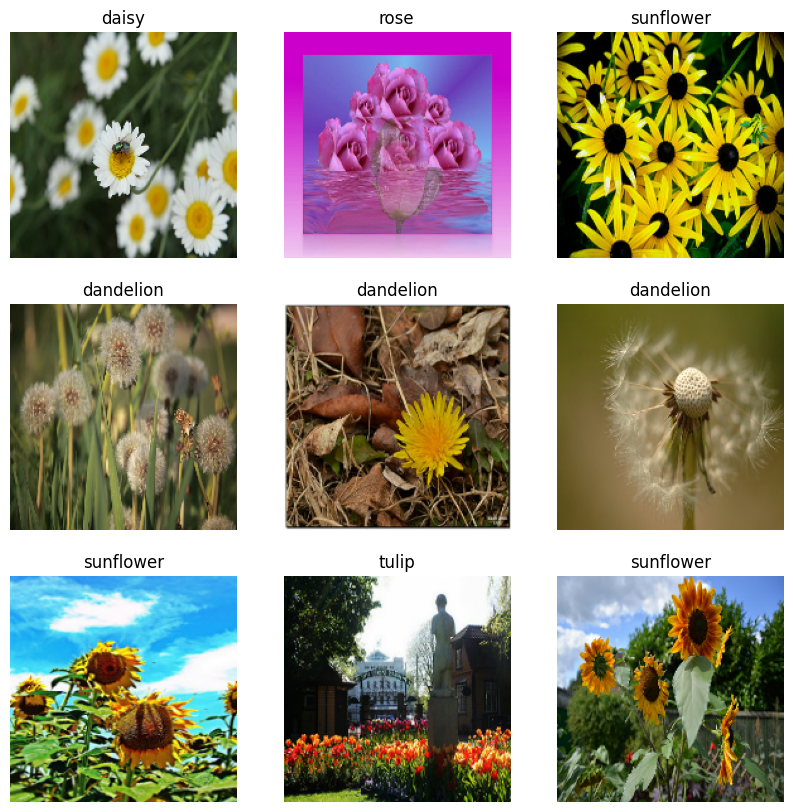

In [186]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [187]:
AUTOTUNE = tf.data.AUTOTUNE

In [188]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [189]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [190]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

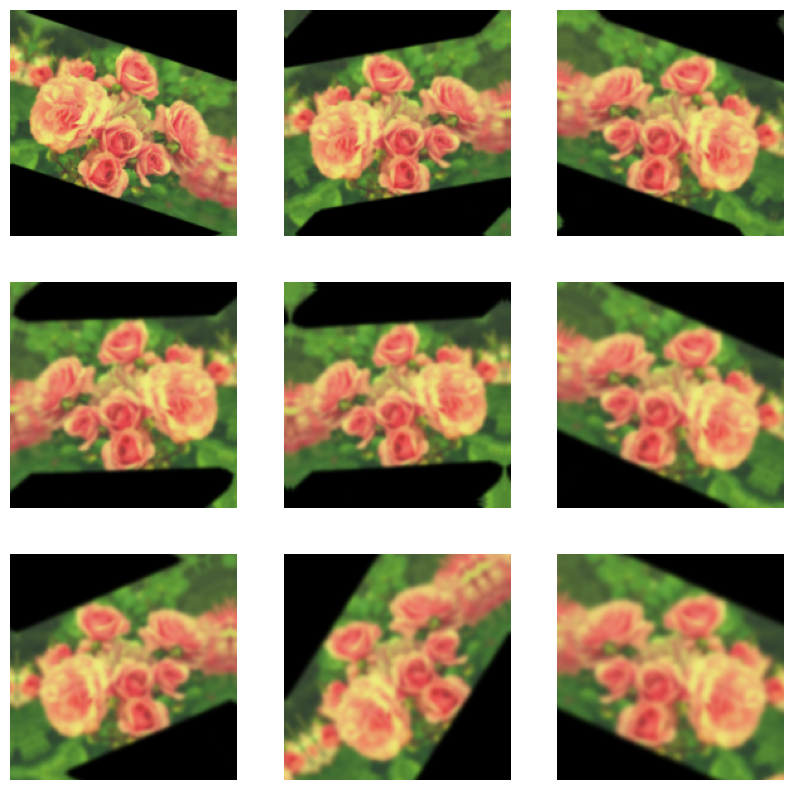

In [191]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [192]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [193]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [194]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [195]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 0.2617 - loss: 1.7163 - val_accuracy: 0.5355 - val_loss: 1.1855
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.5373 - loss: 1.1233 - val_accuracy: 0.5446 - val_loss: 1.1333
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.5923 - loss: 1.0444 - val_accuracy: 0.5920 - val_loss: 1.1040
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.6319 - loss: 0.9293 - val_accuracy: 0.5902 - val_loss: 1.0488
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.6753 - loss: 0.8687 - val_accuracy: 0.6138 - val_loss: 1.0437
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.6857 - loss: 0.8311 - val_accuracy: 0.6393 - val_loss: 0.9384
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.7043 - loss: 0.7700 - val_accuracy: 0.5974 - val_loss: 1.0649
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.6922 - loss: 0.7906 - val_accu

In [196]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [197]:
classify_images('train/rose/3145692843_d46ba4703c.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


'The Image belongs to rose with a score of 89.930275'

In [198]:
model.save('Flower_Recog_Model.keras')
